# Momentum Strategies

# 2. Investigating Momentum

### Data

In this section, we empirically investigate some concerns regarding AQR's new momentum product.
On Canvas, find the data file, `data/momentum_data.xlsx`.

* The first tab contains the momentum factor as an excess return: $\tilde{r}^{\mathrm{mom}}$.
* The second tab contains returns on portfolios corresponding to scored momentum deciles.
  - $r^{\operatorname{mom}(1)}$ denotes the portfolio of stocks in the lowest momentum decile, the "losers" with the lowest past returns.
  - $r^{\operatorname{mom}(10)}$ denotes the portfolio of stocks in the highest momentum decile.
* The third tab gives portfolios sorted by momentum and size.
  - $r^{\text {momsu }}$ denotes the portfolio of small stocks in the top 3 deciles of momentum scores.
  - $r^{\text {momBD }}$ denotes the portfolio of big-stocks in the bottom 3 deciles of momentum scores.

Note that the Fama-French momentum return, $\tilde{r}^{\mathrm{mom}: \mathrm{FF}}$, given in the first tab, is constructed by $\mathrm{FF}$ as,

$$
\tilde{r}^{\mathrm{mom}: \mathrm{FF}}=\frac{1}{2}\left(r^{\mathrm{momBU}}+r^{\mathrm{momSU}}\right)-\frac{1}{2}\left(r^{\mathrm{momBD}}+r^{\mathrm{momSD}}\right)
$$

The Fama-French momentum return

$$\tilde{r}^{mom:FF} = \frac{1}{2} (\tilde{r}^{momBU} + \tilde{r}^{momSU}) − \frac{1}{2} (\tilde{r}^{momBD} + \tilde{r}^{momSD}) $$


| Name          | Unit         | Construction     | Description                                                      |
|---------------|--------------|------------------|------------------------------------------------------------------|
| MKT           | Market       | Excess Return    | Market-cap-weighted US Equities                                  |
| SMB           | Size         | Excess Return    | Small Minus Big: Long small stocks and short big stocks          |
| HML           | Value        | Excess Return    | High Minus Low: Long value (high book-to-market) stocks and short growth (low book-to-market) stocks |
| RF            | Risk-free rate| Total Return    | Tbills                                                           |
| SMALL LoPRIOR | Small Down   | Total Return     | Small Losers: Bottom 3 deciles and Small                         |
| SMALL HiPRIOR | Small Up     | Total Return     | Small Winners: Top 3 deciles and Small                           |
| BIG LoPRIOR   | Big Down     | Total Return     | Big Losers: Bottom 3 deciles and Big                             |
| BIG HiPRIOR   | Big Up       | Total Return     | Big Winners: Top 3 deciles and Big                               |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

factors = pd.read_excel("../data/momentum_data.xlsx", sheet_name="factors (excess returns)", index_col=0, parse_dates=True)
momentum = pd.read_excel("../data/momentum_data.xlsx", sheet_name="momentum (excess returns)", index_col=0, parse_dates=True)
deciles = pd.read_excel("../data/momentum_data.xlsx", sheet_name="deciles (total returns)", index_col=0, parse_dates=True)
terciles = pd.read_excel("../data/momentum_data.xlsx", sheet_name="size_sorts (total returns)", index_col=0, parse_dates=True)
rf = pd.read_excel("../data/momentum_data.xlsx", sheet_name="risk-free rate", index_col=0, parse_dates=True)

sub1 = ("1927", "2024")
sub2 = ("1927", "1993")
sub3 = ("1993", "2008")
sub4 = ("2009", "2024")

factors["UMD"] = momentum["UMD"]

In [2]:
terciles.head()

,SMALL LoPRIOR,ME1 PRIOR2,SMALL HiPRIOR,BIG LoPRIOR,ME2 PRIOR2,BIG HiPRIOR
Date,,,,,,
1927-01-31,-0.0001,0.0369,0.0050,-0.0040,0.0006,0.0023
1927-02-28,0.0673,0.0635,0.0582,0.0655,0.0398,0.0445
1927-03-31,-0.0315,-0.0314,-0.0199,-0.0364,-0.0018,0.0225
1927-04-30,-0.0070,-0.0046,0.0348,-0.0272,0.0073,0.0181
1927-05-31,0.0250,0.1123,0.0664,0.0550,0.0504,0.0692


In [3]:
deciles.head()

,Lo PRIOR,PRIOR 2,PRIOR 3,PRIOR 4,PRIOR 5,PRIOR 6,PRIOR 7,PRIOR 8,PRIOR 9,Hi PRIOR
Date,,,,,,,,,,
1927-01-31,-0.0332,-0.0454,0.0267,-0.0029,-0.0041,0.0093,0.0030,0.0071,-0.0014,-0.0024
1927-02-28,0.0739,0.0601,0.0703,0.0746,0.0434,0.0398,0.0299,0.0320,0.0414,0.0704
1927-03-31,-0.0323,-0.0305,-0.0384,-0.0480,-0.0046,-0.0235,0.0196,0.0049,0.0035,0.0613
1927-04-30,0.0128,-0.0301,-0.0244,0.0043,0.0119,-0.0016,0.0203,-0.0074,0.0181,0.0549
1927-05-31,0.0271,0.0454,0.0597,0.0314,0.0614,0.0593,0.0522,0.0632,0.0819,0.0592


### 2.1 Is Momentum sill profitable?

The excess returns of lucrative trading strategies often disappear once the strategy is well-known. The first widely-cited paper on momentum was published in 1993. Have momentum returns or risk changed since then? The AQR case takes place at the end of 2008. Have momentum returns changed in 2009-2024?

Investigate by filling out the summary statistics below for the full-sample and three sub-samples.

#### (a) 
Using the data provided, fill in Table 1 with the appropriate stats for $\tilde{r}^{\text {mom:FF }}$.

$$
\begin{equation*}
\begin{aligned}
&\text { Table 1: Long-only momentum performance. }\\
&\begin{array}{llllll}
\hline \hline \text { Subsample } \quad \text { mean } \quad \text { vol } & \text { Sharpe } & \text { skewness } & \text { corr. to } \tilde{r}^m & \text { corr. to } \tilde{r}^v \\
\hline \hline & & & & \\
1927-2024 & & & \\
1927-1993 & & & \\
1993-2008 & & & \\
2009-2024 & & & \\
\hline \hline
\end{array}
\end{aligned}
\end{equation*}
$$

In [4]:
def compute_metrics_for_subsample(data_df, col_name, start_year, end_year, annualization=12):
    sub_df = data_df.loc[start_year:end_year]
    metrics = {}

    metrics["mean"] = sub_df[col_name].mean() * annualization
    metrics["vol"] = sub_df[col_name].std() * np.sqrt(annualization)
    metrics["Sharpe"] = metrics["mean"] / metrics["vol"]
    metrics["skewness"] = sub_df[col_name].skew()
    metrics["corr_to_mkt"] = sub_df[col_name].corr(data_df["MKT"])
    metrics["corr_to_val"] = sub_df[col_name].corr(data_df["HML"])

    return metrics

def compute_metrics_for_series_subsample(data_df, factors_df, start_year, end_year, annualization=12):
    sub_df = data_df.loc[start_year:end_year]
    factors_sub_df = factors_df.loc[start_year:end_year]
    metrics = {}

    metrics["mean"] = sub_df.mean() * annualization
    metrics["vol"] = sub_df.std() * np.sqrt(annualization)
    metrics["Sharpe"] = metrics["mean"] / metrics["vol"]
    metrics["skewness"] = sub_df.skew()
    metrics["corr_to_mkt"] = sub_df.corr(factors_sub_df["MKT"])
    metrics["corr_to_val"] = sub_df.corr(factors_sub_df["HML"])

    return metrics

# Collect metrics for each period and display as a DataFrame
periods = [sub1, sub2, sub3, sub4]
period_labels = [f"{period[0]}-{period[1]}" for period in periods]

metrics_list = []
for period in periods:
    metrics = compute_metrics_for_subsample(factors, "UMD", period[0], period[1])
    metrics_list.append(metrics)

metrics_df = pd.DataFrame(metrics_list, index=period_labels)
display(metrics_df)

,mean,vol,Sharpe,skewness,corr_to_mkt,corr_to_val
1927-2024,0.073877,0.162709,0.454040,-3.067270,-0.349164,-0.409795
1927-1993,0.088136,0.160513,0.549089,-3.911021,-0.367499,-0.500962
1993-2008,0.109381,0.171699,0.637052,-0.630596,-0.230990,-0.091966
2009-2024,-0.012888,0.157973,-0.081580,-2.691572,-0.370226,-0.319012


#### (b)
Has momentum changed much over time, as seen through these subsample statistics?


Momentum had a negative mean in the latest subsample, and its Sharpe ratio went from fairly positive (~0.54 to 0.64) to negaive. Arguably, the publication effect "took longer" to eliminate the factor's excess returns. But the factor was relatively stable for the 2 first subsamples.

#### (c) 

Does this data support AQR's argument that momentum is an important piece of the ideal portfolio? What if mean returns to momentum are in actuality near zero due to transaction costs - would there still be evidence here that momentum is valuable?

The negative correlations between momentum and the factors mean it is important. Even if it has underperformed in the recent past, if returns are near zero in actuality you could use for effective hedging.

### 2.2. Whether a long-only implementation of momentum is valuable.

Construct your own long-only implementation:

$$\tilde{r}^{momU:FF} = \frac{1}{2} (\tilde{r}^{momBU} + \tilde{r}^{momSU}) − r^f $$

Note that this is following the FF approach of treating big and small stocks separately. This would be very similar to a scaled version of,

$$\tilde{r}^{momU} = \frac{1}{3} (\tilde{r}^{mom(8)} + \tilde{r}^{mom(9)} + \tilde{r}^{mom(10)}) − r^f $$

For the question below, use the FF-style $\tilde{r}^{momU:FF}_t$

#### (a) 

Fill out Table 2 for the data in the period 1994-2024.

$$
\begin{equation*}
\begin{aligned}
&\text { Table 2: Long-only momentum performance. }\\
&\begin{array}{llllll}
\hline \hline \text { 1994-2024 } & \text { mean } \quad \text { vol } & \text { Sharpe } & \text { skew } & \text { corr. to } \tilde{r}^m & \text { corr. to } \tilde{r}^v \\
\hline \hline \text { Long-and-short, }\left(\tilde{r}^{\text {mom:FF }}\right) & & & \\
\text { Long-only }\left(\tilde{r}^{\text {momU:FF }}\right) & & & \\
\hline \hline
\end{array}
\end{aligned}
\end{equation*}
$$

In [5]:
factors["Long-only"] = ( terciles["BIG HiPRIOR"] + terciles["SMALL HiPRIOR"] ) / 2 - rf["RF"]
factors["Long-short"] = factors["UMD"].copy()

metrics_list = []
metrics_long_only = compute_metrics_for_subsample(factors, "Long-only", '1994', '2024', annualization=12)
metrics_long_short = compute_metrics_for_subsample(factors, "Long-short", '1994', '2024', annualization=12)
metrics_list.append(metrics_long_short)
metrics_list.append(metrics_long_only)

metrics_df = pd.DataFrame(metrics_list, index=["Long-short", "Long-only"])
display(metrics_df)

,mean,vol,Sharpe,skewness,corr_to_mkt,corr_to_val
Long-short,0.043058,0.167231,0.257476,-1.460994,-0.310524,-0.210366
Long-only,0.116103,0.177956,0.652428,-0.441967,0.903985,-0.116289


#### (b)  
Is long-only momentum as attractive as long-short momentum with respect to mean, volatil-ity, and Sharpe Ratio?

Long-only momentum has 2.7x higher mean, slightly higher volatility, and over 2.5x the sharpe. For these metrics alone, the long-only portfolio is attractive.

#### (c) 
Is long-only momentum as diversifying as long-short momentum with respect to market and value premia?

No - long-only has very high correlation to the market factor (90.4%), which negates the hedging value of the long-short portfolio with its negative correlation to the market. The correlation of the long-only portolio with the value factor is also higher than the long-short one's, which makes it a worse hedge against the factor.

#### (d) 
Show a plot of the cumulative product of $1+\tilde{r}^{\text {mom:FF }}$ and $1+\tilde{r}^{\text {momU:FF }}$ over the 1994-2024 subsample. $^2$

Text(0.5, 1.0, 'Cumulative returns')

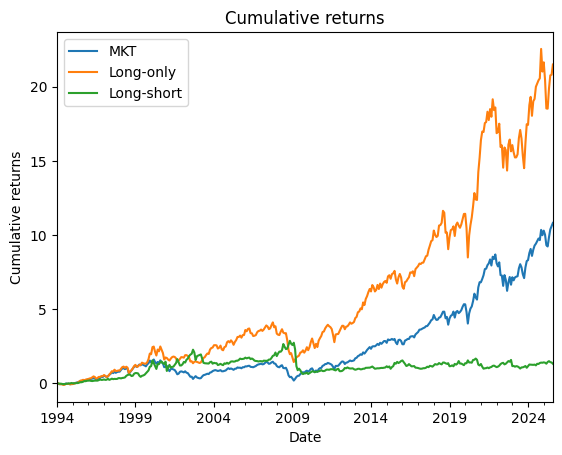

In [6]:
fig, ax = plt.subplots()
(((1 + factors[['MKT', 'Long-only', 'Long-short']].loc['1994':]).cumprod() - 1)).plot(ax=ax)
ax.set_ylabel('Cumulative returns')
ax.set_title('Cumulative returns')

### 2.3. 
Is momentum just data mining, or is it a robust strategy?

Assess how sensitive the threshold for the “winners” and “losers” is in the results. Specifically, we compare three constructions:

- long the top 1 decile and short the bottom 1 deciles:

$$ \tilde{r}^{momD1} = r^{mom(10)} - r^{mom(1)}$$

- long the top 3 deciles and short the bottom 3 deciles:

$$ 
\begin{aligned}
\tilde{r}^{momD3} &= \frac{1}{3}(r^{mom(8)} + r^{mom(9)} + r^{mom(10)}) - \frac{1}{3} (r^{mom(3)} + r^{mom(2)} + r^{mom(1)})\\
&= \frac{1}{3}\sum_{k = 8}^{10} r^{mom(k)} - \frac{1}{3}\sum_{k = 1}^{3} r^{mom(k)} 
\end{aligned}$$

- long the top 5 deciles and short the bottom 5 decile:

$$ \tilde{r}^{momD5} = \frac{1}{5}\sum_{k = 6}^{10} r^{mom(k)} - \frac{1}{5}\sum_{k = 1}^{5} r^{mom(k)} $$

#### (a) 
Compare all three constructions, (in the full-sample period,) by filling out the stats in the table below for the period 1994-2025.

$$
\begin{equation}
\begin{aligned}
&\text { Table 3: Robustness of momentum construction. }\\
&\begin{array}{lllllll}
\hline \hline \text { 1994-2025 } \quad \text { mean } & \text { vol } & \text { Sharpe } & \text { skewness } & \text { corr. to } \tilde{r}^m & \text { corr. to } \tilde{r}^v \\
\hline \hline \tilde{r}^{\text {momD1 }} & & & & & \\
\tilde{r}^{\text {momD3 }} & & & & \\
\tilde{r}^{\text {momD5 }} & & & & \\
\hline \hline
\end{array}
\end{aligned}
\end{equation}
$$

In [7]:
# no need to subtract rf from the deciles because it cancels out
top_1_decile = deciles["Hi PRIOR"] - deciles["Lo PRIOR"]
top_3_deciles = (deciles["Hi PRIOR"] + deciles["PRIOR 9"] + deciles["PRIOR 8"])/3 - (deciles["Lo PRIOR"] + deciles["PRIOR 2"] + deciles["PRIOR 3"])/3
top_5_deciles = deciles["Hi PRIOR"] - deciles["Lo PRIOR"]

for dec in range(1,5):
    top_5_deciles += deciles[f"PRIOR {10-dec}"] - deciles[f"PRIOR {1+dec}"]
top_5_deciles = top_5_deciles/5

top_1_decile.head()

top1metrics = compute_metrics_for_series_subsample(top_1_decile, factors, "1994", "2025", annualization=12)
top3metrics = compute_metrics_for_series_subsample(top_3_deciles, factors, "1994", "2025", annualization=12)
top5metrics = compute_metrics_for_series_subsample(top_5_deciles, factors, "1994", "2025", annualization=12)

In [8]:
metrics_list = []
metrics_list.append(top1metrics)
metrics_list.append(top3metrics)
metrics_list.append(top5metrics)

metrics_df = pd.DataFrame(metrics_list, index=["Top 1 decile", "Top 3 deciles", "Top 5 deciles"])
display(metrics_df)

,mean,vol,Sharpe,skewness,corr_to_mkt,corr_to_val
Top 1 decile,0.074195,0.298661,0.248425,-1.271370,-0.320216,-0.245515
Top 3 deciles,0.026747,0.193075,0.138534,-1.319554,-0.354271,-0.220957
Top 5 deciles,0.015525,0.133542,0.116254,-1.407710,-0.348999,-0.214293


#### (b) 
Do the tradeoffs between the 1-decile, 3-decile, and 5-decile constructions line up with the theoretical tradeoffs we discussed in the lecture?

Yes - taking fewer stocks has higher mean returns but higher volatility, while taking more reduces both.

#### (c) 
Should AQR's retail product consider using a 1-decile or 5-decile construction?

If AQR can operationalize their rebalancing such as to reduce transaction costs and tracking error for relatively high turnover, the 1-decile construction with its higher Sharpe ratio is likely better.

#### (d) 
Does $\tilde{r}^{\text {momD3 }}$ have similar stats to the Fama-French construction in (1). Recall that construction is also a 3-decile, long-short construction, but it is segmented for small and large stocks. Compare the middle row of Table 3 with the top row of Table 2.

The portfolios have similar statistics. 

| Portfolio | mean     | vol      | Sharpe   | skewness  | corr_to_mkt | corr_to_val |
|-----------|----------|----------|----------|-----------|-------------|-------------|
| FF        | 0.043058 | 0.167231 | 0.257476 | -1.460994 | -0.310524   | -0.210366   |
| momD3     | 0.026747 | 0.193075 | 0.138534 | -1.319554 | -0.354271   | -0.220957   |

We can see FF has higher mean and lower vol, and thus a higher Sharpe, similar skewnesses and correlations.

### 2.4. 
Does implementing momentum require trading lots of small stocks-- thus causing even larger trading costs?

For regulatory and liquidity reasons, AQR is particularly interested in using larger stocks for their momentum baskets. (Though they will launch one product that focuses on medium-sized stocks.)

Use the data provided on both small-stock “winners”, $r^{momSU}$, and small-stock “losers”, $r^{momSD}$, to construct a small-stock momentum portfolio,

$$ r^{momS}_t = r^{momSU}_t - r^{momSD}_t $$

Similarly, use the data provided to construct a big-stock momentum portfolio,

$$ r^{momB}_t = r^{momBU}_t − r^{momBD}_t $$

#### (a) 
Fill out Table 4 over the sample 1994-2024.

$$
\begin{equation*}
\begin{aligned}
&\text { Table 4: Momentum of small and big stocks. }\\
&\begin{array}{llllll}
\hline \hline \text { 1994-2024 } & \text { mean } & \text { vol } & \text { Sharpe } & \text { skewness } & \text { corr. to } \tilde{r}[m] \\
\hline \hline \text { All stocks, } \tilde{r}^{\text {mom:FF }} & & & & \\
\text { Small stocks } r_t^{\text {mom } S} & & & \\
\text { Large stocks } r_t^{\text {mom } B} & & & \\
\hline
\end{array}
\end{aligned}
\end{equation*}
$$

In [9]:
mom_s = terciles['SMALL HiPRIOR'] - terciles['SMALL LoPRIOR']
mom_b = terciles['BIG HiPRIOR'] - terciles['BIG LoPRIOR']

mom_size_name = ['Small stocks','Big stocks']
mom_df = factors.copy()
mom_df[mom_size_name] = pd.concat([mom_s, mom_b], axis=1)
metrics_list = []
metrics_list.append(compute_metrics_for_subsample(mom_df, "UMD", "1994", "2025", annualization=12))
metrics_list.append(compute_metrics_for_subsample(mom_df, "Small stocks", "1994", "2025", annualization=12))
metrics_list.append(compute_metrics_for_subsample(mom_df, "Big stocks", "1994", "2025", annualization=12))
metrics_df = pd.DataFrame(metrics_list, index=["All stocks", "Small stocks", "Big stocks"])
display(metrics_df)

,mean,vol,Sharpe,skewness,corr_to_mkt,corr_to_val
All stocks,0.041315,0.166054,0.248803,-1.451926,-0.305551,-0.215138
Small stocks,0.061797,0.167692,0.368514,-1.813338,-0.309372,-0.138885
Big stocks,0.020773,0.181850,0.114229,-0.855287,-0.272719,-0.264906


#### (b) 
Is the attractiveness of the momentum strategy mostly driven by the small stocks? That is, does a momentum strategy in large stocks still deliver excess returns at comparable risk?

Small stocks have over 3x the Sharpe ratio of big stocks, but the strategy in large stocks still does deliver excess returns. Big stocks have less negative skewness and more negative correlation to the value factor, which are useful for the portfolio construction.

### 2.5. 
In conclusion, what is your assessment of the AQR retail product? Is it capturing the important features of the Fama-French construction of momentum? Would you suggest any modifications?

The AQR product would be delivering excess returns to investors by capturing the behavior of the Fama-French construction, as seen in 2.3(d), if it was a long-short portfolio. The long-only portfolio is much more correlated to the market beta factor.

Rebalancing cadence might be one of the parameters with the most space for tuning to maximize returns considering transaction costs and considering tracking error.